In [2]:
import numpy as np
import matplotlib.pyplot as plt

def CIRSinglePath(
    R_0: float, kappa: float, 
    theta: float, sigma: float, 
    T: float, N: int, rng: np.random.Generator
):
    dt = T / N
    rates = np.empty(N + 1)
    rates[0] = R_0

    for i in range(1, N + 1):
        dW = rng.normal(0, np.sqrt(dt))
        dr = kappa * (theta - rates[i - 1]) * dt + sigma * np.sqrt(rates[i - 1]) * dW
        rates[i] = abs(rates[i - 1] + dr)

    return rates

In [3]:
R_0 = 0.05  # Initial interest rate
kappa = 0.3  # Mean reversion rate
theta = 0.05  # Long-term mean interest rate
sigma = 0.02  # Volatility
T = 1.0  # Time horizon in years
N = 252  # Number of time steps
rng = np.random.default_rng(seed=42)  # Random number generator

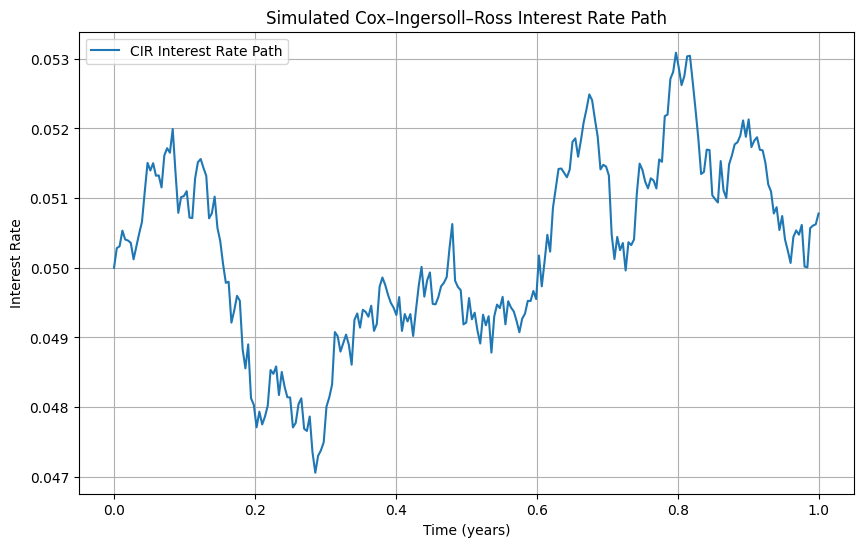

In [9]:
cir_path = CIRSinglePath(R_0, kappa, theta, sigma, T, N, rng)

# Plot the simulated path
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N + 1), cir_path, label='CIR Interest Rate Path')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.title('Simulated Cox–Ingersoll–Ross Interest Rate Path')
plt.legend()
plt.grid(True)
plt.show()